In [7]:
# Import library
import torch

import numpy as np
import torch.nn as nn # All neural network
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets,transforms # pytorch computer vision library
from torch.utils.data.sampler import SubsetRandomSampler

ModuleNotFoundError: No module named 'torch'

import numpy as np
import torch.nn as nn # All neural network
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets,transforms # pytorch computer vision library
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
# Define the transform to convert images to tensor and normalize
transform=transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.5,),(0.5,),)]) #(C*H*W)

# transforms.Compose- Create a Series of Transformation to preapre the dataset
#transforms.ToTensor- Convert image into tensor
# transforms.Normalize- Normalize image with mean and std

In [3]:
# Load the data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=True,transform=transforms)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data', download=True, train=False,transform=transforms)

NameError: name 'datasets' is not defined

In [10]:
# Prepare the dataset for validation

In [ ]:
trainset

In [12]:
testset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: /home/labsuser/.pytorch/F_MNIST_data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [13]:
#Preparing for validaion test
indices = list(range(len(trainset)))
np.random.shuffle(indices)
#to get 20% of the train set
split = int(np.floor(0.2 * len(trainset)))
train_sample = SubsetRandomSampler(indices[:split]) #0:
valid_sample = SubsetRandomSampler(indices[split:]) #20

#Data Loader
trainloader = torch.utils.data.DataLoader(trainset, sampler=train_sample, batch_size=64) # takes our data batch size , 
validloader = torch.utils.data.DataLoader(trainset, sampler=valid_sample, batch_size=64)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True) 

In [17]:
dataiter = iter(trainloader)
print(dataiter)
#images, labels = dataiter.

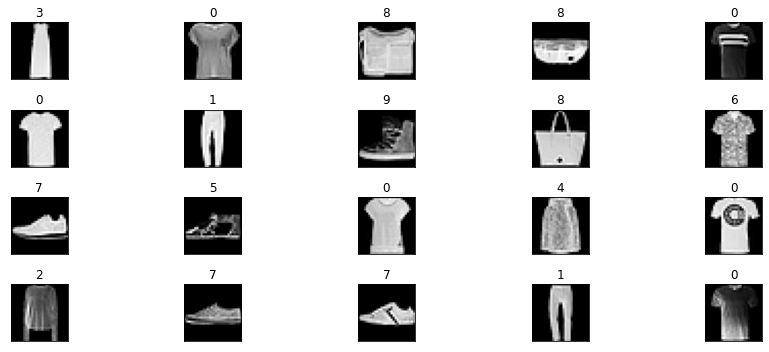

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
# get some random training images
dataiter = iter(trainloader)
print(dataiter)
images, labels = dataiter.next()
#images, labels = trainloader

fig = plt.figure(figsize=(15,5))
for idx in np.arange(20):
  # xticks=[], yticks=[] is empty to print the images without any ticks around them
  #np.sqeeze : Remove single-dimensional entries from the shape of an array.
  ax = fig.add_subplot(4, 5, idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap='gray')
   # .item() gets the value contained in a Tensor
  ax.set_title(labels[idx].item())
  fig.tight_layout()

In [6]:
# Build the Neural Network
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(784,120) # input , output
        self.fc2=nn.Linear(120,120)
        self.fc3=nn.Linear(120,10)
        self.dropout=nn.Dropout(0.2) 
    
    def forward(self,x):
        # in forward model , we take tensor input x change its shape to our batch size by using x.shape[0], -1 to fill second dim
        x=x.view(x.shape[0],-1)
        x=self.dropout(F.relu(self.fc1(x)))
        x=self.dropout(F.relu(self.fc2(x)))
        x=F.log_softmax(self.fc3(x),dim=1)
        return x


NameError: name 'nn' is not defined

In [1]:
model = Classifier()
#defining the loss function
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

valid_loss_min = np.Inf #using this high value to make sure the update the weight first time
epochs = 40
steps = 0
model.train() #prep model for training
train_losses, valid_losses = [],[]
for e in range(epochs):
  running_loss =0 
  valid_loss = 0
   # train the model #
  for images, labels in trainloader:

     optimizer.zero_grad()
     log_ps = model(images) # Forward pass 
     loss = criterion(log_ps, labels)
     loss.backward()
     optimizer.step()
     running_loss += loss.item()*images.size(0)
  
  for images, labels in validloader:
     log_ps = model(images)
     loss = criterion(log_ps, labels)
     valid_loss += loss.item()*images.size(0)

  running_loss = running_loss/len(trainloader.sampler)
  valid_loss =  valid_loss/len(validloader.sampler)
  train_losses.append(running_loss)
  valid_losses.append(valid_loss)

  print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        e+1,
        running_loss,
        valid_loss
    ))
  if valid_loss <= valid_loss_min:
      print('validation loss decreased({:.6f} -->{:.6f}). Saving Model ...'.format(valid_loss_min, valid_loss))
      torch.save(model.state_dict(), 'model.pt')
      valid_loss_min = valid_loss

NameError: name 'Classifier' is not defined